# Gathering information about our data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [2]:
kc_house_data = pd.read_csv('kc_house_data.csv')

import pandas_profiling

profile = kc_house_data.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

In [3]:
display(kc_house_data.head())
kc_house_data.columns

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
kc_house_data.shape #how many rows and columns

(21597, 21)

In [5]:
kc_house_data.info() #gives a brief overview on missing data
# most seem to have all data, apart from waterfront, view, yr_renovated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
kc_house_data.isna().sum()
# as of now, doesn't seem to be any column with a large proportion of missing data, so no need to drop any right now

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# End goal is to create a multiple linear regression with exogenous variables (i.e. sqr footage, waterfront)
# to predict our endogenous variable (Regressand) in house prices

# the dataset contains 21597 observations
# the dataset contains 18 variables we can use in our regression
# 1. bedrooms - no. of bedrooms (0.5 Bedroom or Half Bedroom means its length and breadth will be less than 10 ft)
# 2. bathrooms - no. of bathrooms (0.5 bathroom indicates just toilet and sink, no tub or shower)
# 3. sqft_living - square footage of the home only
# 4. sqft_lot - square footage of the lot
# 5. floors - how many floors are in the house
# 6. waterfront - does the property have a view to waterfront - binary variable (0 means no, 1 means yes)
# 7. view - how many times the property has been viewed
# 8. condition - 1-5 rating of condition. Higher is better (i think)
# 9. grade - construction quality of improvements on a scale of 1-13
# 10. sqft_above - square footage of house excluding basement
# 11. sqft_basement - square footage of basement
# 12. yr_built
# 13. yr_renovated
# 14. zipcode 
# 15. lat - latitude
# 16. long - longitude
# 17. sqft_living15 - if renovation took place in 2015 this should be different to sqft_living
# 18. sqft_lot15 - if renovation took place in 2015 this should be different to sqft_lot

In [8]:
# some questions we could ask. Anomalous values?
# which variables have a lot of missing data?
# how are variables distributed?
# problem of multicolinearity i.e. is no. of bedrooms highly correlated with no. of bathrooms
#     could we drop some variables if we think this is a problem?
# how many properties were renovated in 2015?
# are houses that are renovated more valuable on average? 
# look at correlation between some variables and prices

# BEDROOMS ANALYSIS

In [9]:
kc_house_data.bedrooms.value_counts()
# minimum of 3 bedrooms, 11 and 33 bedrooms represent a very small proportion of data set, so let's drop these rows
# generally the rule is 1.5*IQR above q3 or below q1. these values are considered outliers
# in this case, it would suggest dropping any propoerties with more than 5.5 bedrooms i.e. 6 or more

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

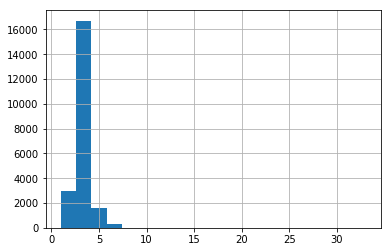

In [10]:
# to illustrate these outliers, can use a histrogram
kc_house_data.bedrooms.hist(bins = 20)
# the outlier, especially at 33 makes this histogram look bad

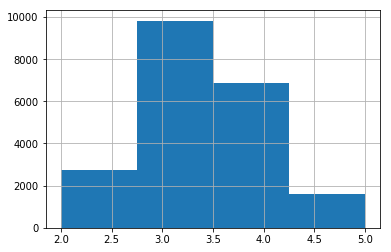

In [11]:
# lets drop the outlier at 33
bedrooms_outliers_dropped = kc_house_data[~(kc_house_data['bedrooms'] > 5) & ~(kc_house_data['bedrooms'] < 1.5)]['bedrooms']
bedrooms_outliers_dropped.hist(bins = 4)
# this is our new histogram with outliers dropped 
# exhibits some positive skew and high kurtosis